<a href="https://colab.research.google.com/github/YADHUSUDHAN/AIL411-DEEP-LEARNING-LAB-KTU/blob/main/Trasfer_learning_pretrained_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg19 import preprocess_input


**Loading and Preprocessing the Dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = np.repeat(np.expand_dims(train_images, axis=-1), 3, axis=-1)
test_images = np.repeat(np.expand_dims(test_images, axis=-1), 3, axis=-1)


train_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in train_images])
test_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in test_images])


train_images_vgg = preprocess_input(train_images_resized)
test_images_vgg = preprocess_input(test_images_resized)


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



11490434/11490434 [==============================] - 0s 0us/step


**Building and Compiling the Model**

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 [==============================] - 1s 0us/step


**Training the Model**

In [ ]:
history = model.fit(train_images_vgg, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 68s 77ms/step - loss: 0.8492 - accuracy: 0.7340 - val_loss: 0.1400 - val_accuracy: 0.9608
Epoch 2/5
750/750 [==============================] - 57s 76ms/step - loss: 0.1458 - accuracy: 0.9596 - val_loss: 0.0829 - val_accuracy: 0.9774
Epoch 3/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0931 - accuracy: 0.9744 - val_loss: 0.0925 - val_accuracy: 0.9783
Epoch 4/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0876 - accuracy: 0.9763 - val_loss: 0.0873 - val_accuracy: 0.9757
Epoch 5/5
750/750 [==============================] - 58s 77ms/step - loss: 0.0749 - accuracy: 0.9798 - val_loss: 0.0959 - val_accuracy: 0.9814


**Evaluating the Model on the Test Set**

In [ ]:
test_loss, test_acc = model.evaluate(test_images_vgg, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 [==============================] - 5s 16ms/step - loss: 0.0890 - accuracy: 0.9823
Test accuracy: 98.23%


**Plotting Training and Validation Accuracy**

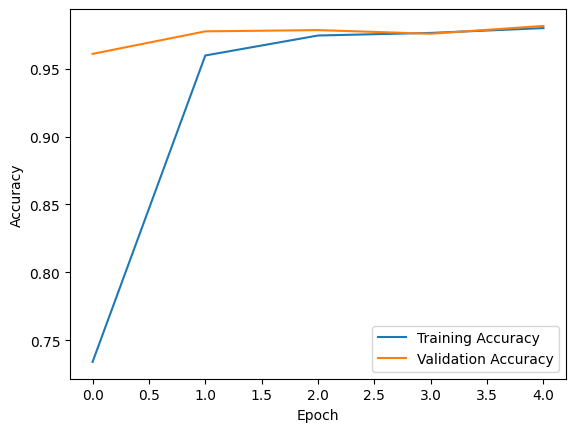

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


**Plotting Confusion Matrix**

313/313 [==============================] - 4s 13ms/step


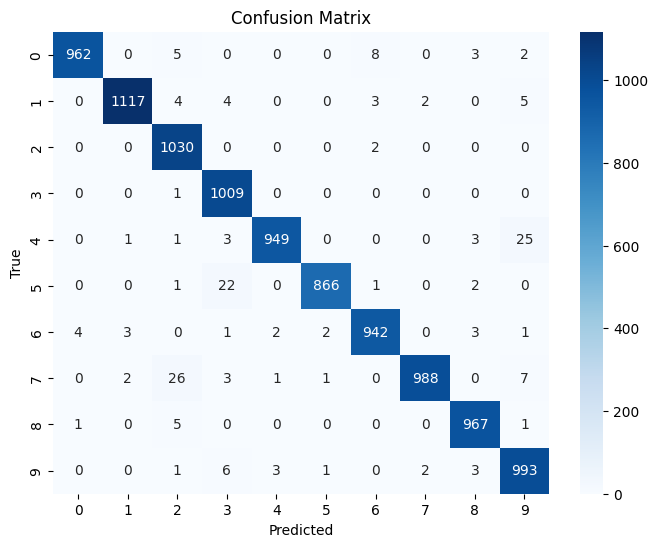

In [ ]:
y_pred = model.predict(test_images_vgg)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
